# quantile-quantile plot example

- wiki : https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot
- python: # https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html

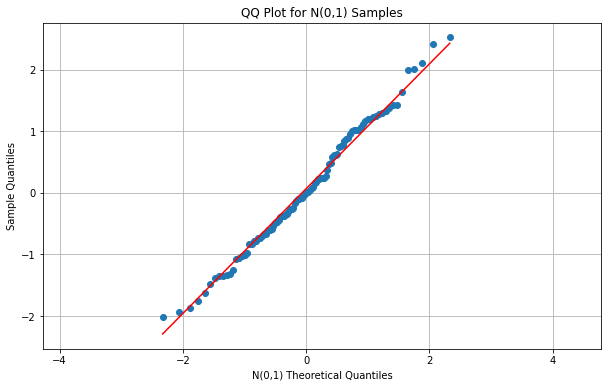

In [1]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats

# Number of samples
n = 100

# Generate random samples from N(0,1)
samples = np.random.normal(0, 1, n)
samples.sort()
x_max = max(samples)
x_min = min(samples)

# Create a QQ plot on a specific axis
fig, ax = plt.subplots(figsize=(10, 6))
qqplot = sm.qqplot(samples, line='s', ax=ax)
ax.set_title("QQ Plot for N(0,1) Samples")
ax.axis('equal')
ax.set_xlim([x_min, x_max])
ax.set_xlabel('N(0,1) Theoretical Quantiles')
ax.grid(True)

# Show the plot
plt.show()

# We plotted (s, t)

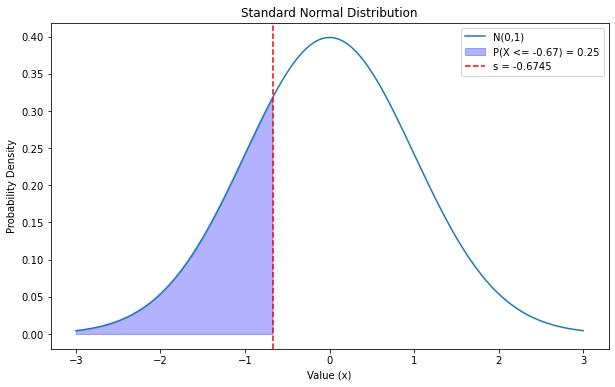

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define the quantile value
q = 0.25

# Calculate the corresponding z-score
s = stats.norm.ppf(q)

# Create a range of x values for the plot
x = np.linspace(-3, 3, 1000)

# Calculate the PDF of the standard normal distribution
pdf = stats.norm.pdf(x)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the PDF of the standard normal distribution
ax.plot(x, pdf, label='N(0,1)')

# Shade the area to the left of s
ax.fill_between(x, pdf, where=(x <= s), alpha=0.3, color='blue', label=f'P(X <= {s:.2f}) = {q:.2f}')

# Add a vertical line at s
ax.axvline(s, color='red', linestyle='--', label=f's = {s:.4f}')

# Set labels, title, and legend
ax.set_xlabel('Value (x)')
ax.set_ylabel('Probability Density')
ax.set_title('Standard Normal Distribution')
ax.legend()

# Display the plot
plt.show()


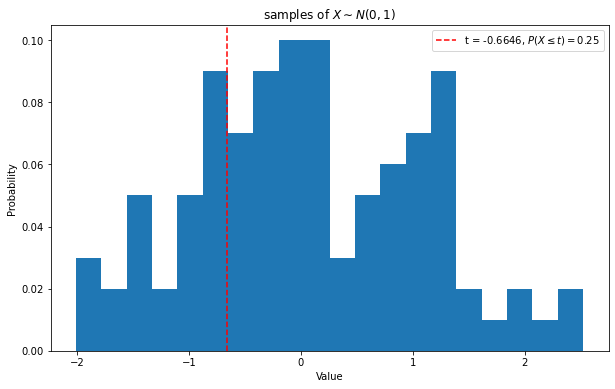

In [3]:
import numpy as np
import matplotlib.pyplot as plt

q = 0.25
t = np.quantile(samples, q)

# Create a histogram to approximate the PMF
hist, bins = np.histogram(samples, bins=20, density=True)

# Calculate bin widths
bin_widths = bins[1:] - bins[:-1]

# Calculate the approximate PMF
pmf = hist * bin_widths

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the approximate PMF using ax
ax.bar(bins[:-1], pmf, width=bin_widths, align='edge')
ax.axvline(t, color='red', linestyle='--', label=f't = {t:.4f}, $P(X\leq t)={q}$')

# Set labels and title
ax.set_xlabel('Value')
ax.set_ylabel('Probability')
ax.set_title(f'samples of $X\sim N(0,1)$')
ax.legend()

# Display the plot
plt.show()

# qqplot example2

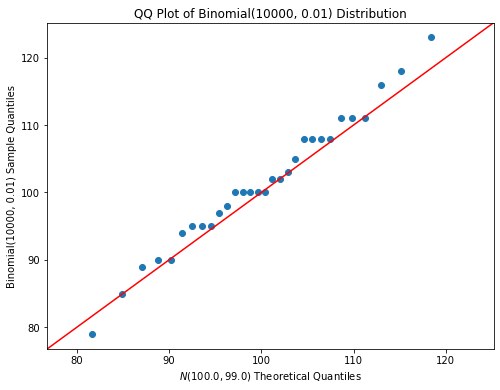

Binomial samples: [ 79  85  89  90  90  94  95  95  95  97  98 100 100 100 100 100 102 102
 103 105 108 108 108 108 111 111 111 116 118 123]


In [4]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define the parameters for the Binomial distribution
n = 10000  # Number of trials
p = 0.01   # Probability of success

# Generate random samples from a Binomial distribution
sample_size = 30
binomial_samples = np.random.binomial(n, p, size=sample_size)
binomial_samples.sort()

# Create a QQ plot using statsmodels with a theoretical Normal distribution
mean = n * p
variance = n * p * (1 - p)
stddev = np.sqrt(variance)
theoretical_distribution = stats.norm(loc=mean, scale=stddev)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the QQ plot on the axis
sm.qqplot(binomial_samples, dist=theoretical_distribution, line='45', ax=ax)  # '45' indicates a 45-degree reference line

# Set title and labels
ax.set_title("QQ Plot of Binomial({}, {}) Distribution".format(n, p))
ax.set_xlabel(f'$N({mean}, {variance})$ Theoretical Quantiles')
ax.set_ylabel('Binomial({}, {}) Sample Quantiles'.format(n,p))

# Display the plot
plt.show()

print("Binomial samples:",binomial_samples)

In [5]:
# Standardize the samples
standardized_samples = (binomial_samples - binomial_samples.mean()) / binomial_samples.std()
print("Standardized samples:", standardized_samples)

Standardized samples: [-2.30491667 -1.68660817 -1.27440251 -1.17135109 -1.17135109 -0.75914543
 -0.65609401 -0.65609401 -0.65609401 -0.44999118 -0.34693977 -0.14083694
 -0.14083694 -0.14083694 -0.14083694 -0.14083694  0.0652659   0.0652659
  0.16831731  0.37442014  0.68357439  0.68357439  0.68357439  0.68357439
  0.99272864  0.99272864  0.99272864  1.50798572  1.71408855  2.22934563]


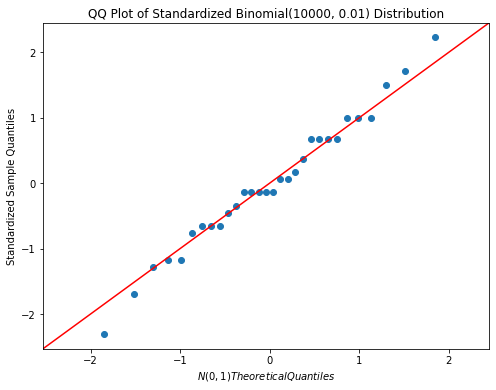

In [6]:
# Create a QQ plot for the standardized samples using statsmodels
theoretical_distribution = stats.norm()
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(standardized_samples, dist=theoretical_distribution, line='45', ax=ax)  # '45' indicates a 45-degree reference line

# Set title and labels
ax.set_title("QQ Plot of Standardized Binomial({}, {}) Distribution".format(n, p))
ax.set_xlabel('$N(0,1) Theoretical Quantiles$')
ax.set_ylabel('Standardized Sample Quantiles')

# Display the plot
plt.show()